In [1]:
# Import all the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set plot style and ensure plots appear in the notebook
sns.set_style("whitegrid")
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


Data loaded successfully.


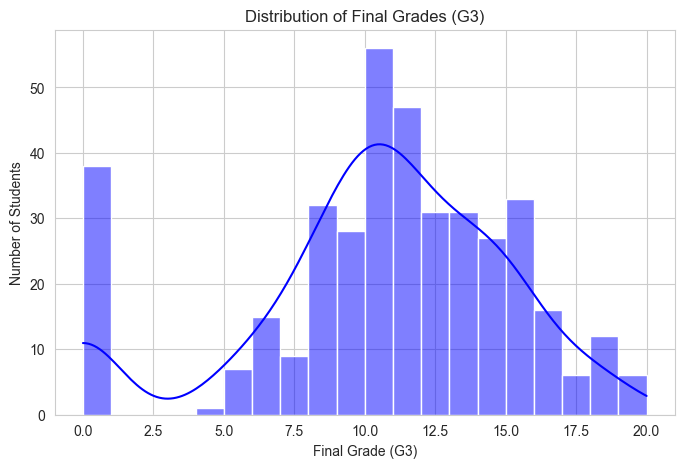

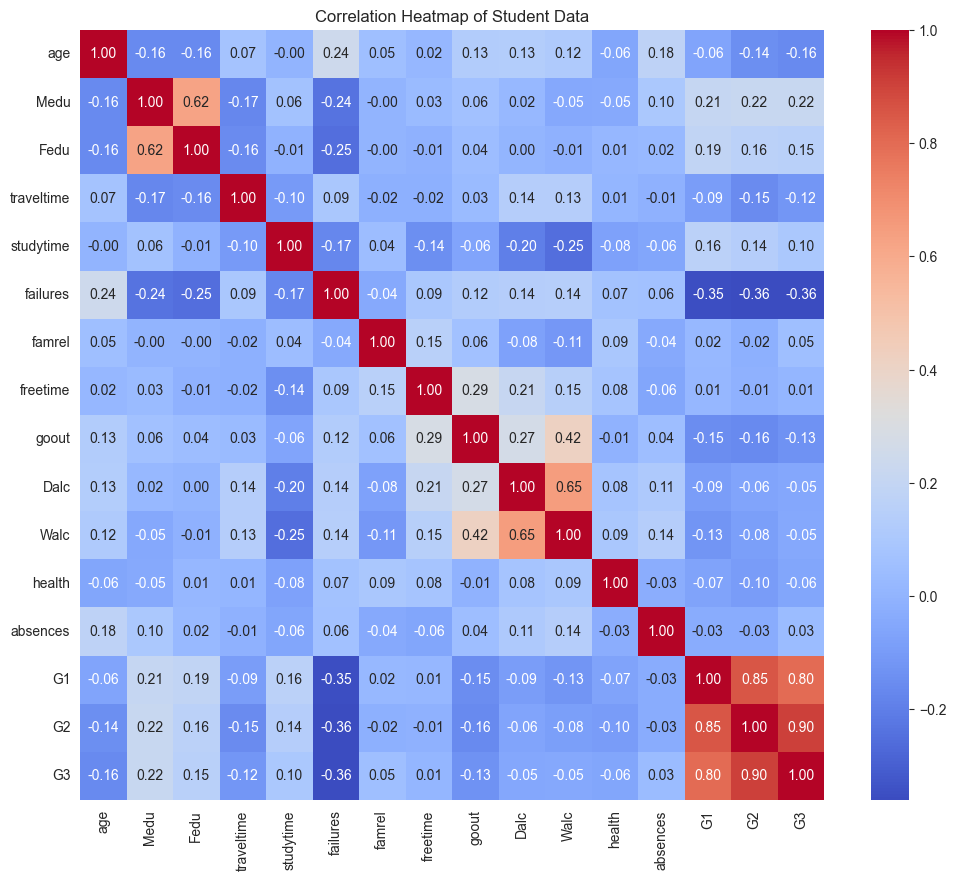

In [2]:
# --- IMPORTANT: You found your separator is a comma (','). ---
# If you ever use the original file, you might need sep=';'
try:
    df = pd.read_csv('student-mat.csv', sep=',')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'student-mat.csv' not found. Please upload it to Jupyter.")
    # Stop the script if the file isn't found
    raise

# --- Visualization 1: Distribution of Final Grades (G3) ---
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()

# --- Visualization 2: Correlation Heatmap ---
# Select only numeric columns for the heatmap
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Student Data')
plt.show()

In [3]:
# 1. Select our features (X) and target (y)
features = ['G1', 'G2', 'studytime', 'failures', 'absences']
target = 'G3'

X = df[features]
y = df[target]

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Regression data split:")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Regression data split:
Training data shape: (316, 5)
Testing data shape: (79, 5)


In [4]:
# --- Model 1: Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)

# --- Model 2: Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Regression models (Linear and Random Forest) trained successfully!")

Regression models (Linear and Random Forest) trained successfully!


In [5]:
# Make predictions on the test data
preds_lr = lr.predict(X_test)
preds_rf = rf.predict(X_test)

# --- Evaluate Linear Regression ---
r2_lr = r2_score(y_test, preds_lr)
mse_lr = mean_squared_error(y_test, preds_lr)
print("--- Linear Regression ---")
print(f"R-squared (Accuracy): {r2_lr:.4f}")
print(f"Mean Squared Error: {mse_lr:.4f}")


# --- Evaluate Random Forest ---
r2_rf = r2_score(y_test, preds_rf)
mse_rf = mean_squared_error(y_test, preds_rf)
print("\n--- Random Forest ---")
print(f"R-squared (Accuracy): {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")

print("\n--- Conclusion ---")
if r2_rf > r2_lr:
    print("Random Forest performed better, just as the CV states!")
else:
    print("Linear Regression performed better.")

--- Linear Regression ---
R-squared (Accuracy): 0.7822
Mean Squared Error: 4.4665

--- Random Forest ---
R-squared (Accuracy): 0.8714
Mean Squared Error: 2.6369

--- Conclusion ---
Random Forest performed better, just as the CV states!


Saved 'predictions_vs_actual.png'


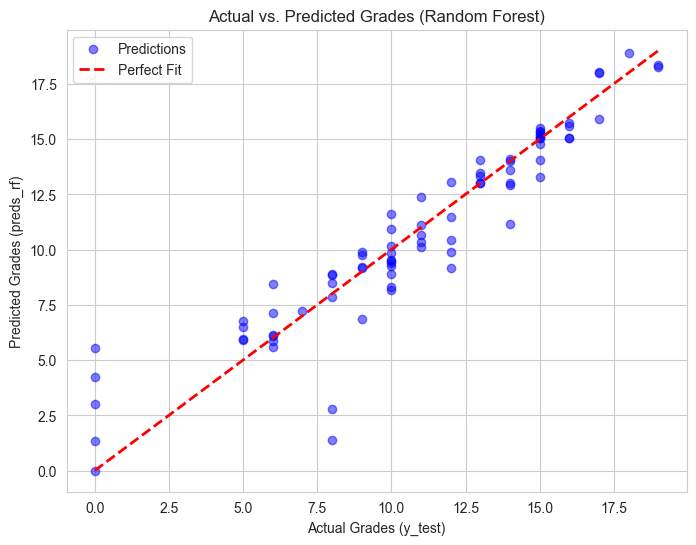

In [6]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_rf, alpha=0.5, color='blue', label='Predictions')

# Add a "perfect" red line. This is the line y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Grades (Random Forest)')
plt.xlabel('Actual Grades (y_test)')
plt.ylabel('Predicted Grades (preds_rf)')
plt.legend()
plt.grid(True)

# --- Save the plot as a file ---
plt.savefig('predictions_vs_actual.png')
print("Saved 'predictions_vs_actual.png'")

plt.show()

Saved 'feature_importance.png'


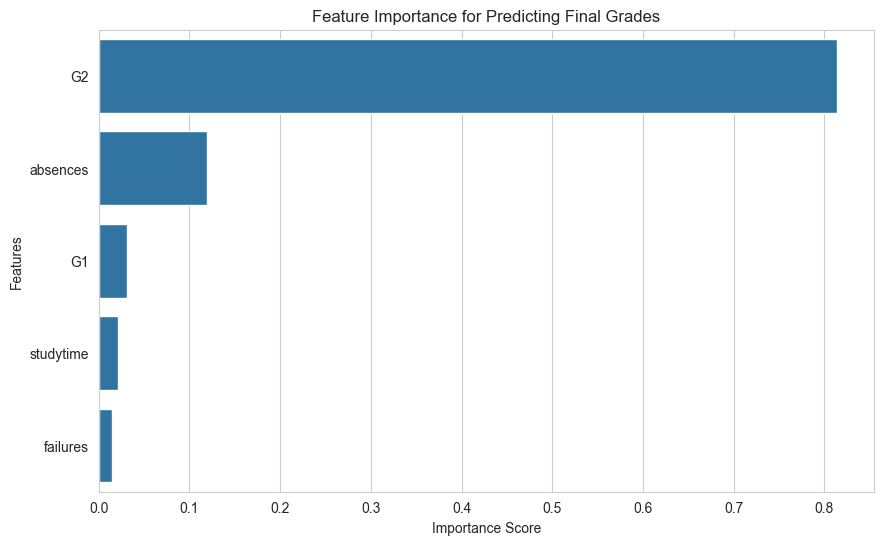

In [7]:
# Get the importance scores from the trained model
importances = rf.feature_importances_
feature_names = features # This is the 'features' list from cell 3

# Create a 'Series' to hold the data and sort it
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df, y=feature_importance_df.index)

plt.title('Feature Importance for Predicting Final Grades')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# --- Save the plot as a file ---
plt.savefig('feature_importance.png')
print("Saved 'feature_importance.png'")

plt.show()

In [8]:
# Define Pass (1) as a grade of 10 or more, Fail (0) otherwise
df['Pass_Fail'] = (df['G3'] >= 10).astype(int)

print("New 'Pass_Fail' column created:")
print(df[['G3', 'Pass_Fail']].head())

# Define our new target variable
y_class = df['Pass_Fail']

# We can reuse X (the features) from cell 3
# We split again to ensure our X and y_class match up
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

print("\nClassification data split successfully.")

New 'Pass_Fail' column created:
   G3  Pass_Fail
0   6          0
1   6          0
2  10          1
3  15          1
4  10          1

Classification data split successfully.


In [9]:
# Create and train the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_c, y_train_c)

print("Classifier model (Random Forest) trained successfully!")

Classifier model (Random Forest) trained successfully!


Classification Accuracy: 91.14%
Saved 'confusion_matrix.png'


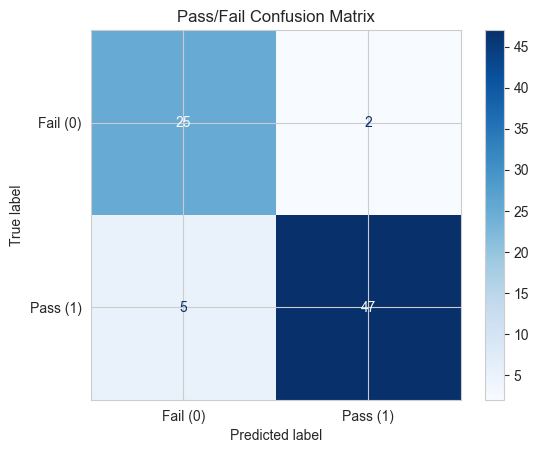


--- Project Complete ---


In [11]:
# Make predictions
preds_c = rfc.predict(X_test_c)

# Check accuracy
accuracy = accuracy_score(y_test_c, preds_c)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# --- Visualization: Confusion Matrix ---
cm = confusion_matrix(y_test_c, preds_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail (0)', 'Pass (1)'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Pass/Fail Confusion Matrix')

# --- Save the plot as a file ---
plt.savefig('confusion_matrix.png')
print("Saved 'confusion_matrix.png'")

plt.show()
print("\n--- Project Complete ---")